Enter here

<h1>Forecasting number of Air Passengers for next 1 years</h1>

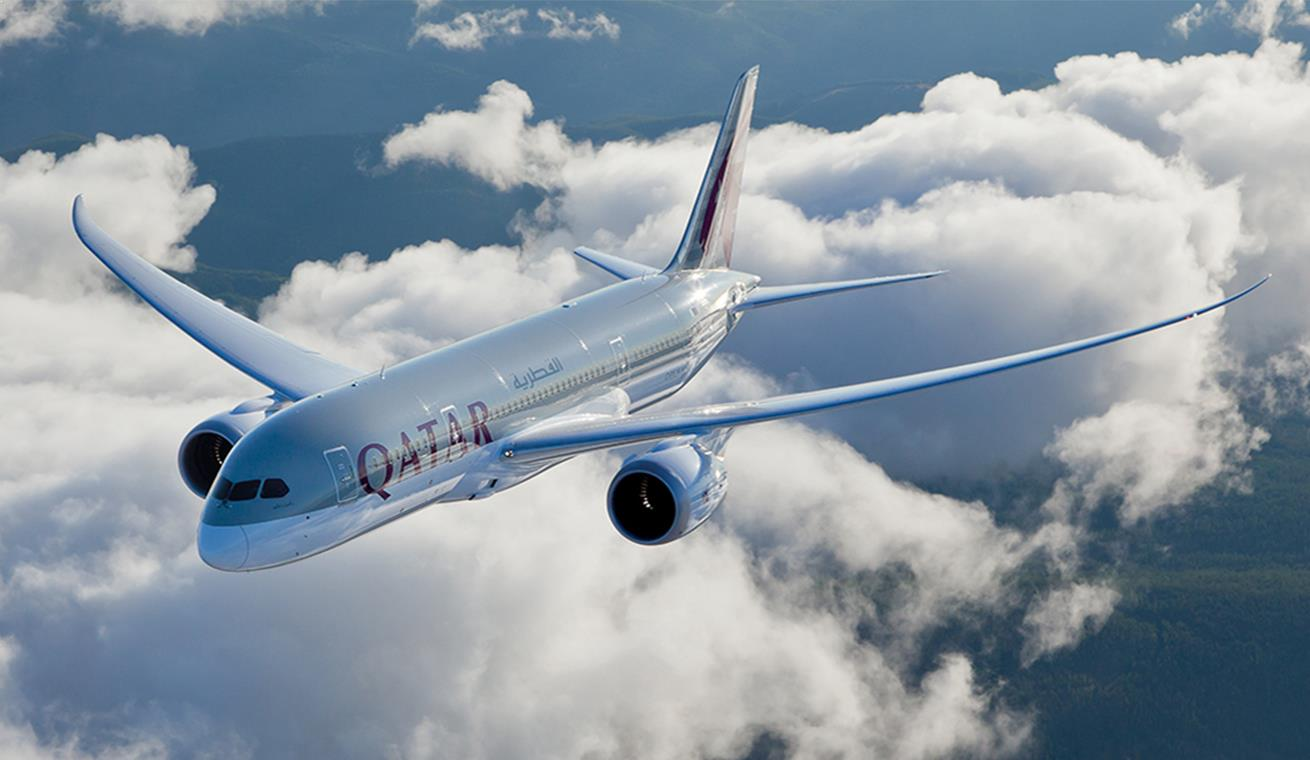

- Importing all the required libraries for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

- Reading the dataset file and checking the size of file

In [2]:
data=pd.read_csv(r'Data\nalegaon.csv')
data.shape

(394, 2)

In [3]:
WINDOW_SIZE = 14

- Creating the 'Date' as Index for data and viewing the dataset

In [4]:
data['date']=pd.to_datetime(data['date'], infer_datetime_format=True)
data=data.set_index(['date'])
print(data.head())
print(data.tail())

            weight
date              
2020-02-01   10420
2020-02-02   10660
2020-02-03   10152
2020-02-04   11431
2020-02-05   12939
            weight
date              
2021-02-24   12745
2021-02-25   11953
2021-02-26   11259
2021-02-27   12688
2021-02-28    9956


- Visualizing the Time Series plot for the number of Air Passengers 

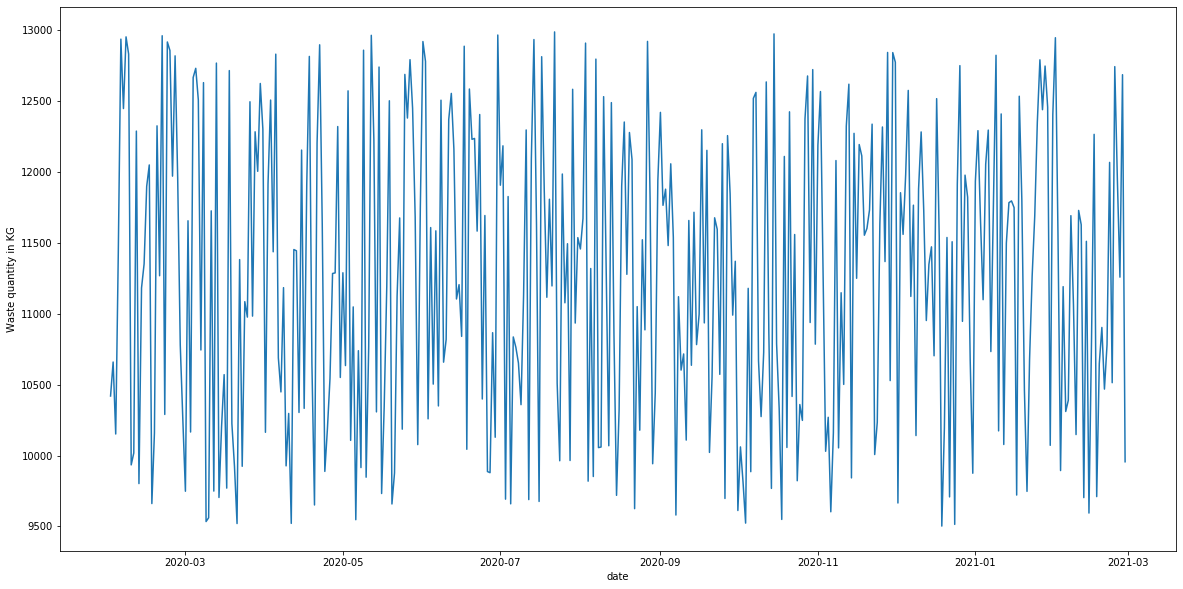

In [5]:
plt.figure(figsize=(20,10))
plt.xlabel("date")
plt.ylabel("Waste quantity in KG")
plt.plot(data)

- As we know that, A stationary Time Series is one which characteristics like mean and variance does not change over time
- Preparing the data for analyzing the Rolling Mean and Standard Deviation to check stationarity for given Time Series

In [6]:
rolmean=data.rolling(window=WINDOW_SIZE).mean()
rolstd=data.rolling(window=WINDOW_SIZE).std()
print(rolmean.head(15))
print(rolstd.head(15))

                  weight
date                    
2020-02-01           NaN
2020-02-02           NaN
2020-02-03           NaN
2020-02-04           NaN
2020-02-05           NaN
2020-02-06           NaN
2020-02-07           NaN
2020-02-08           NaN
2020-02-09           NaN
2020-02-10           NaN
2020-02-11           NaN
2020-02-12           NaN
2020-02-13           NaN
2020-02-14  11315.714286
2020-02-15  11421.428571
                 weight
date                   
2020-02-01          NaN
2020-02-02          NaN
2020-02-03          NaN
2020-02-04          NaN
2020-02-05          NaN
2020-02-06          NaN
2020-02-07          NaN
2020-02-08          NaN
2020-02-09          NaN
2020-02-10          NaN
2020-02-11          NaN
2020-02-12          NaN
2020-02-13          NaN
2020-02-14  1188.547687
2020-02-15  1168.398688


- Plotting the Rolling Mean and Standard Deviation, which has window of 12
- By looking below plot, we conclude that, it is non-stationary bcoz mean and variance is not constant

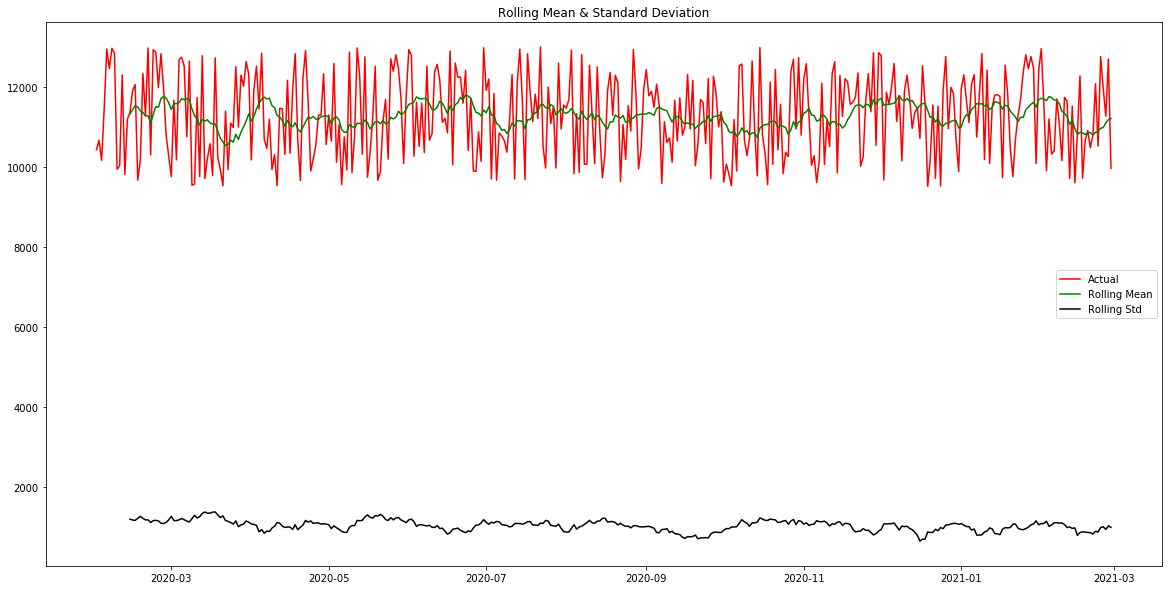

In [7]:
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

- Using ADF (Augmented Dickey-Fuller Test) to check stationarity, another approach based on statistics.
- ADF has : 
<b>Null hypothesis         - Time Series is non-stationary</b>

In [8]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['weight'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic          -20.194381
p-value                   0.000000
Lags Used                 0.000000
No. of Obs              393.000000
Critical Value (1%)      -3.447099
Critical Value (5%)      -2.868923
Critical Value (10%)     -2.570703
dtype: float64


- From above ADF test, we fail to reject the null hypothesis, since p-value is greater than 0.05

- Below we took log transformation to make our Time series stationary and plotted visual for it
- We found graph upward trending over time with seasonality 

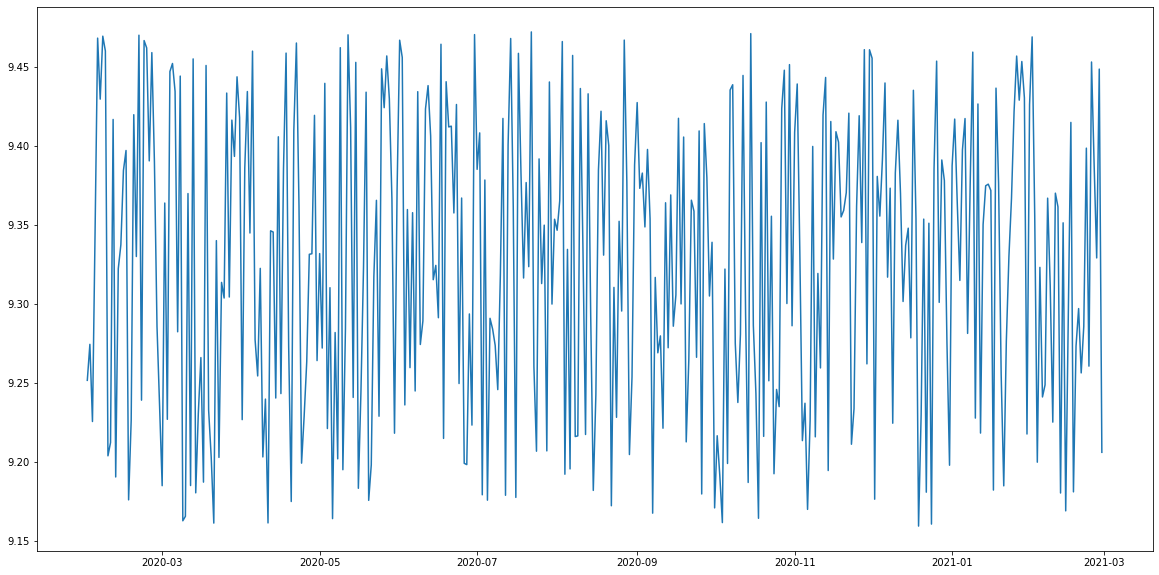

In [9]:
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

- Testing Rolling Mean with window 12 on above log transformation and concluded non-stationary, again

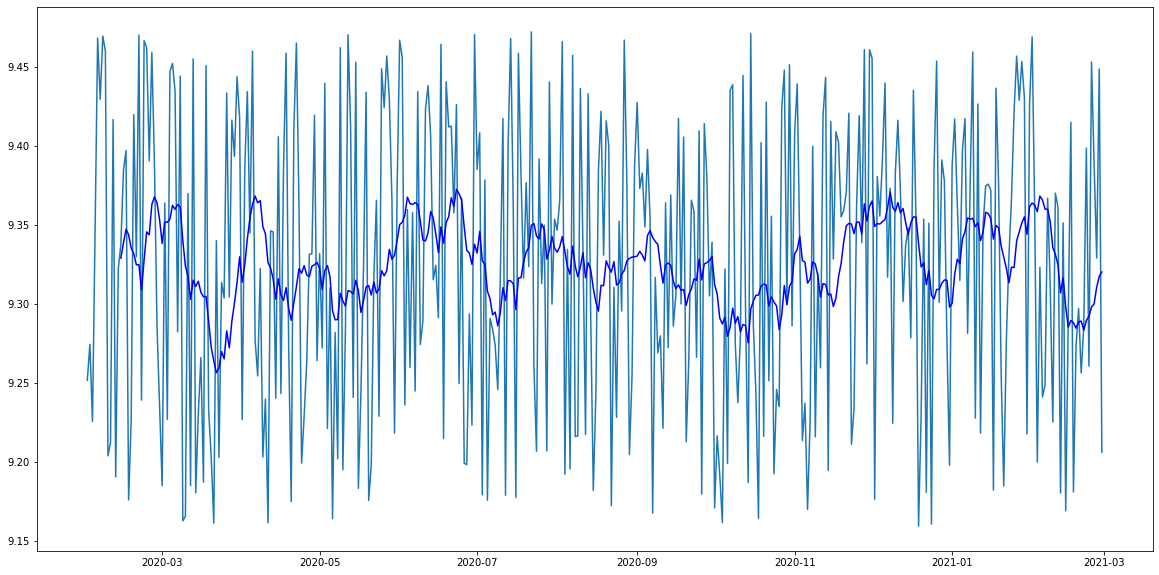

In [10]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=WINDOW_SIZE).mean()
MStd=data_log.rolling(window=WINDOW_SIZE).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')

- Using another method differencing, to make our time series stationary

In [11]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

weight
date              
2020-02-01     NaN
2020-02-02     NaN
2020-02-03     NaN
2020-02-04     NaN
2020-02-05     NaN
2020-02-06     NaN
2020-02-07     NaN
2020-02-08     NaN
2020-02-09     NaN
2020-02-10     NaN
2020-02-11     NaN
2020-02-12     NaN

- Output of differencing method, after dropping null values

In [12]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

weight
date                
2020-02-14  0.008390
2020-02-15  0.045960
2020-02-16  0.049809
2020-02-17 -0.167701
2020-02-18 -0.109012

- Defining function for Rolling Mean and Standard Deviation & ADF test

In [13]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['weight'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

- Checking the stationarity of differenced data
- From Rolling method, we see that Mean and standard deviation is not varying.
- From ADF, we reject the null hypothesis bcoz p-value is less than 0.05 (significance level)
- Applying all the transformation and methods, our differenced data is now stationary

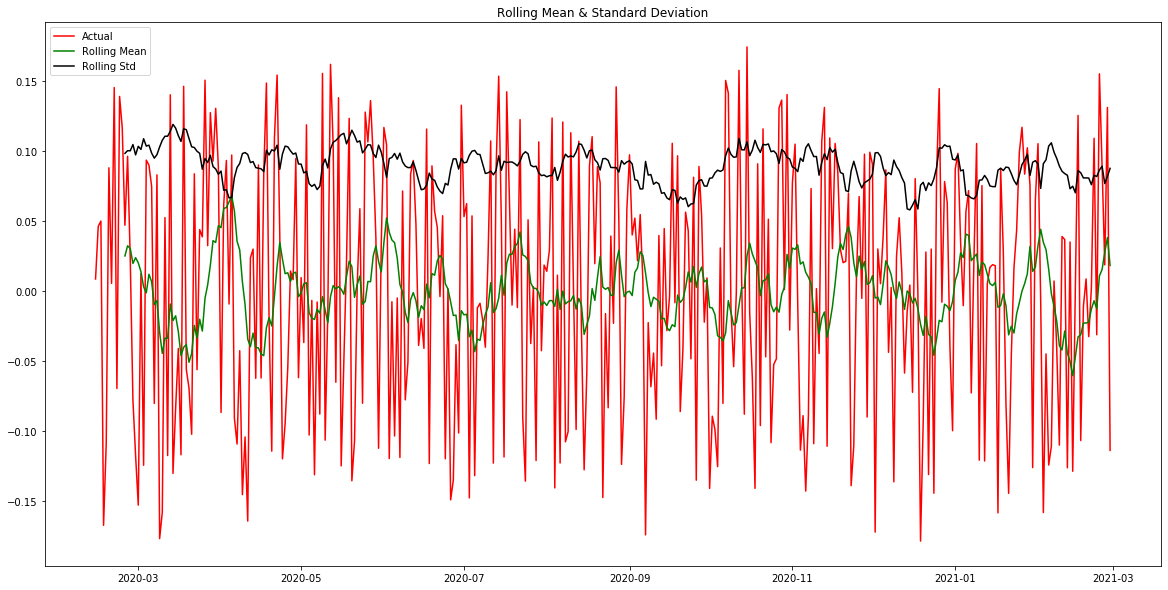

Dickey-Fuller Test: 
Test Statistic          -19.940916
p-value                   0.000000
Lags Used                 0.000000
No. of Obs              380.000000
Critical Value (1%)      -3.447676
Critical Value (5%)      -2.869176
Critical Value (10%)     -2.570838
dtype: float64


In [14]:
stationarity(data_log_diff)

- Checking for Trend stationarity and performing exponential transformation on our data

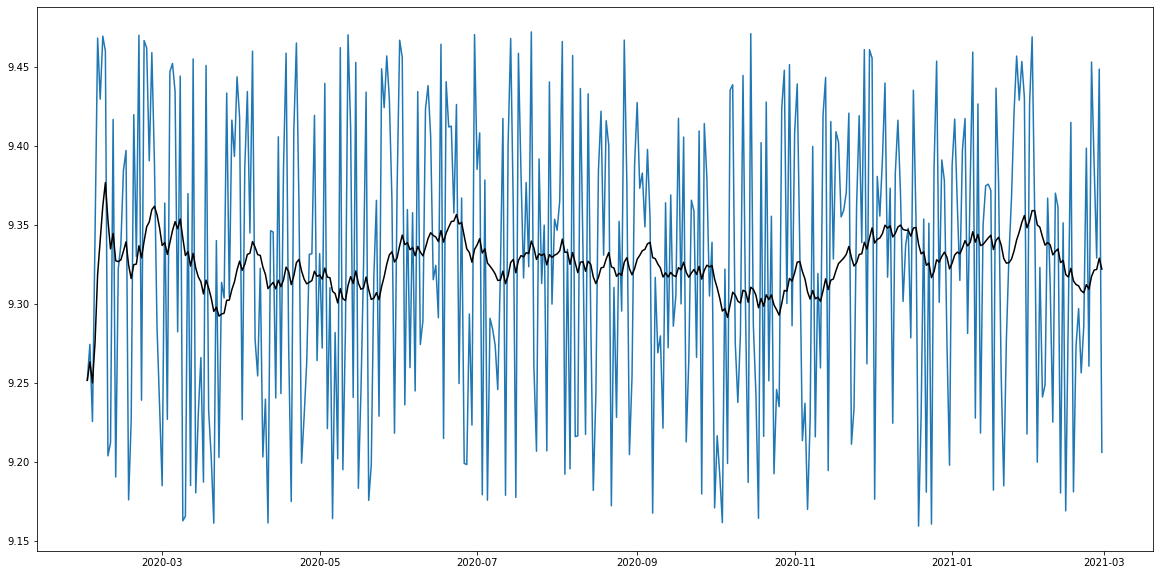

In [15]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='black')

- Since log transformation is non-stationary, applying differencing on our data.

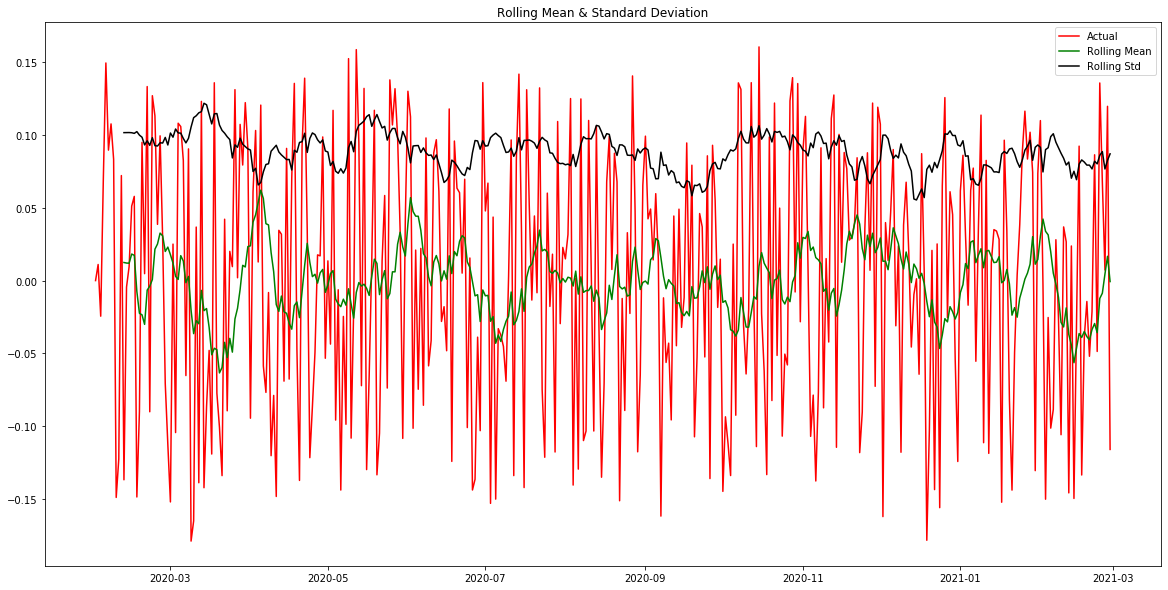

Dickey-Fuller Test: 
Test Statistic          -20.725321
p-value                   0.000000
Lags Used                 0.000000
No. of Obs              393.000000
Critical Value (1%)      -3.447099
Critical Value (5%)      -2.868923
Critical Value (10%)     -2.570703
dtype: float64


In [16]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

- From above graph and ADF test, we conclude, it is trend stationary

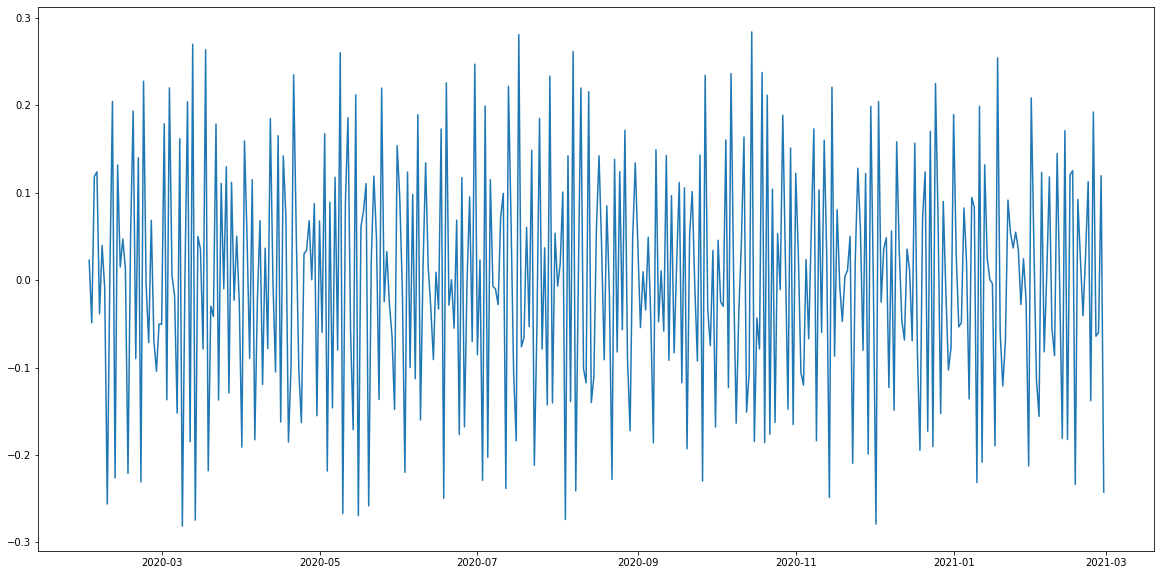

In [17]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

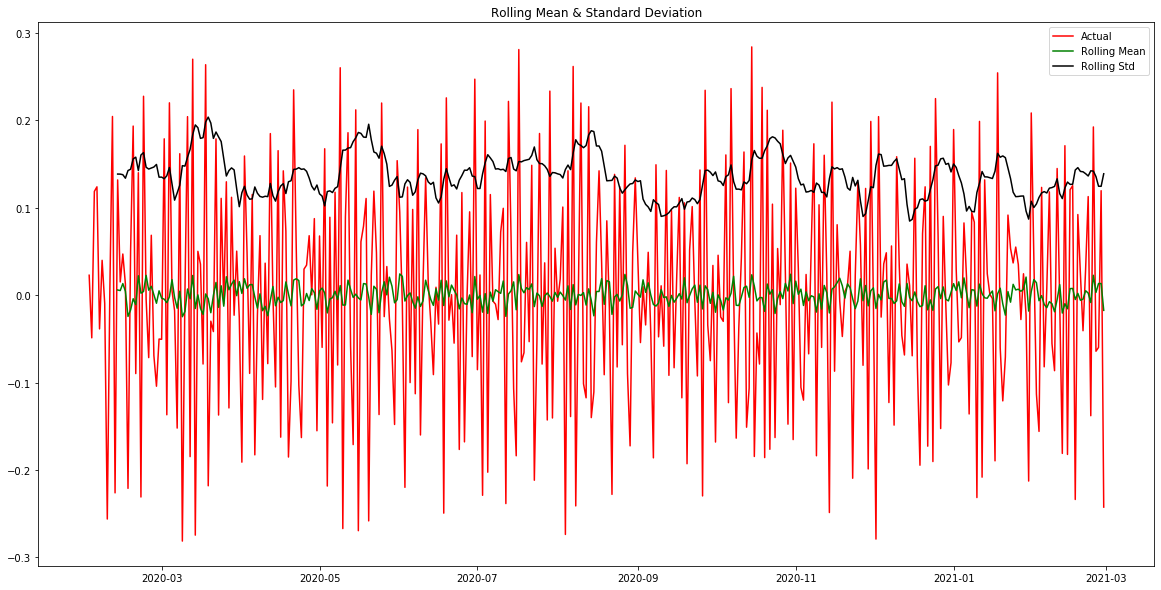

Dickey-Fuller Test: 
Test Statistic         -8.887403e+00
p-value                 1.269241e-14
Lags Used               1.400000e+01
No. of Obs              3.780000e+02
Critical Value (1%)    -3.447769e+00
Critical Value (5%)    -2.869217e+00
Critical Value (10%)   -2.570860e+00
dtype: float64


In [18]:
data_shift=data_shift.dropna()
stationarity(data_shift)

- Decomposing Time Series into its components : Trend, Seasonality and Residual

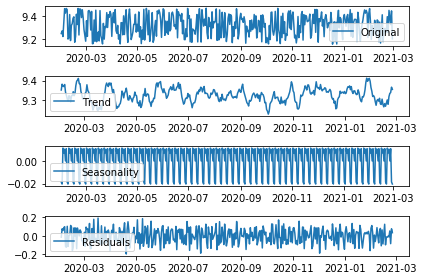

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

- Checking the stationarity of Time Series components

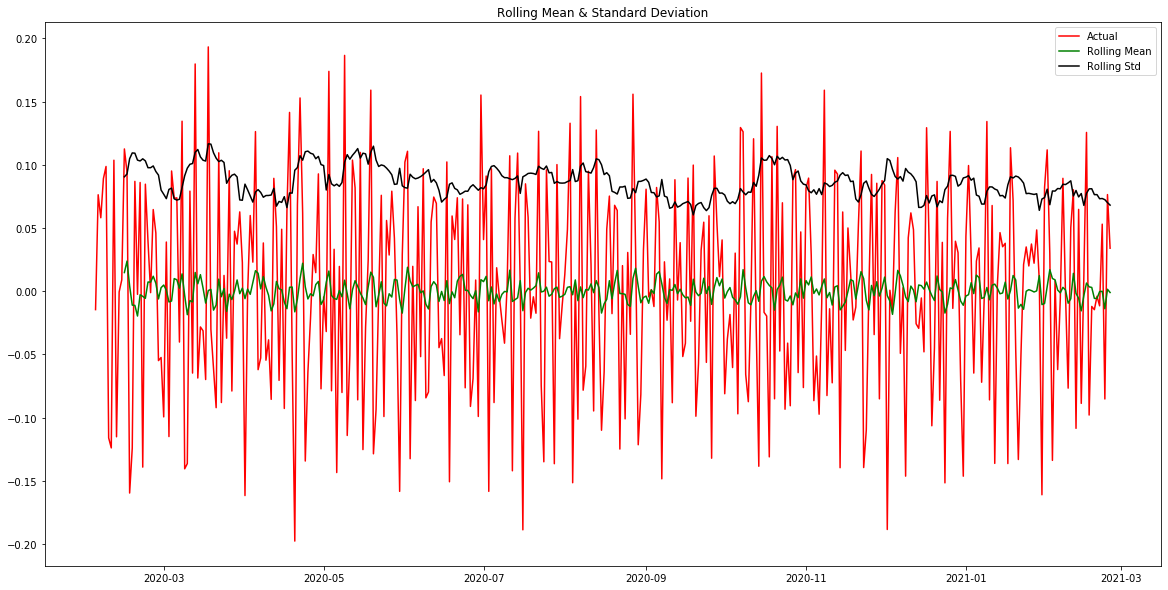

Dickey-Fuller Test: 
Test Statistic         -9.257104e+00
p-value                 1.439801e-15
Lags Used               1.700000e+01
No. of Obs              3.700000e+02
Critical Value (1%)    -3.448148e+00
Critical Value (5%)    -2.869383e+00
Critical Value (10%)   -2.570948e+00
dtype: float64


In [20]:
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

- Plotting the ACF and PACF to find q and p value
- We got q and p both 2 from the graph

Text(0.5, 1.0, 'Partial Autocorrelation Function')

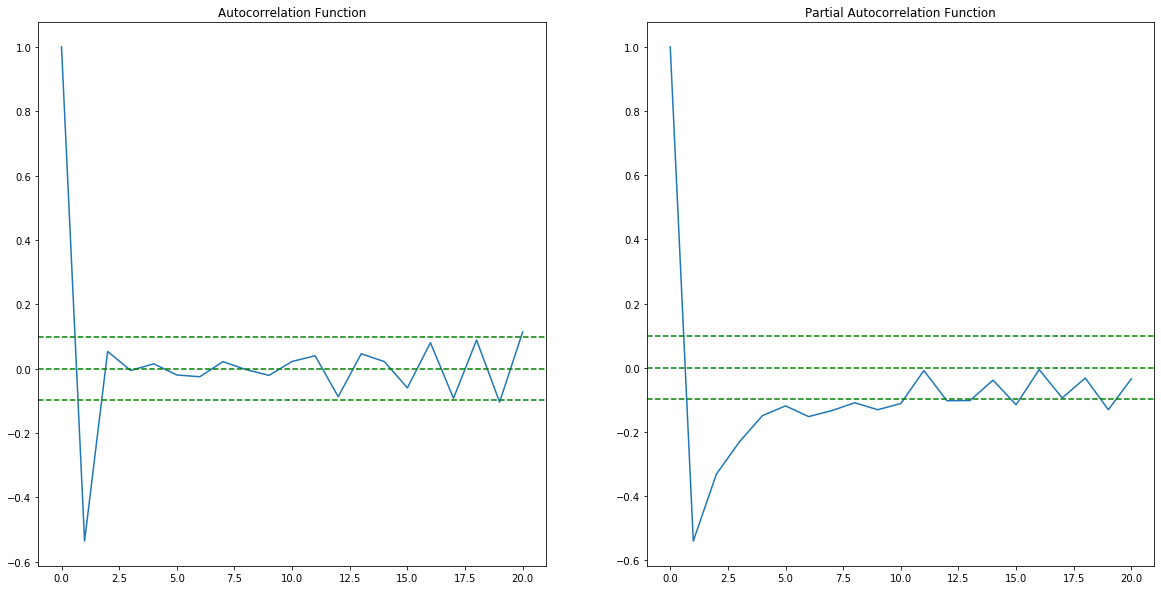

In [21]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

- Building the ARIMA model with p=2, q=2 and I=1

D:\SYSTEM\Programs\Anacodna\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\SYSTEM\Programs\Anacodna\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


plotting ARIMA model


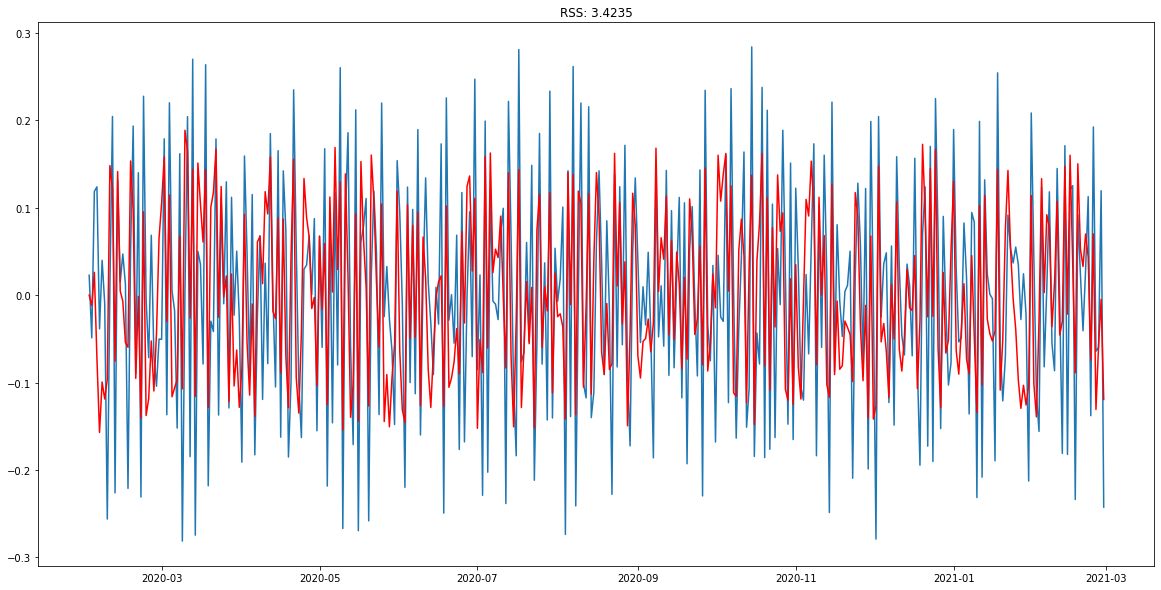

In [22]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['weight'])**2))
print('plotting ARIMA model')

- Predicted values from ARIMA model in difference form

In [23]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

date
2020-02-02    0.000011
2020-02-03   -0.011768
2020-02-04    0.026104
2020-02-05   -0.072774
2020-02-06   -0.157090
dtype: float64


- Performing Inverse Transformation for differencing, by doing cumulative sum

In [24]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

date
2020-02-02    0.000011
2020-02-03   -0.011757
2020-02-04    0.014347
2020-02-05   -0.058426
2020-02-06   -0.215516
dtype: float64


- Below is data display of predicted value in log scale

In [25]:
predictions_log=pd.Series(data_log['weight'].ix[0], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

date
2020-02-01    9.251482
2020-02-02    9.251494
2020-02-03    9.239725
2020-02-04    9.265830
2020-02-05    9.193056
dtype: float64

Taking out log transformation and visualizing actual vs predicted value graph

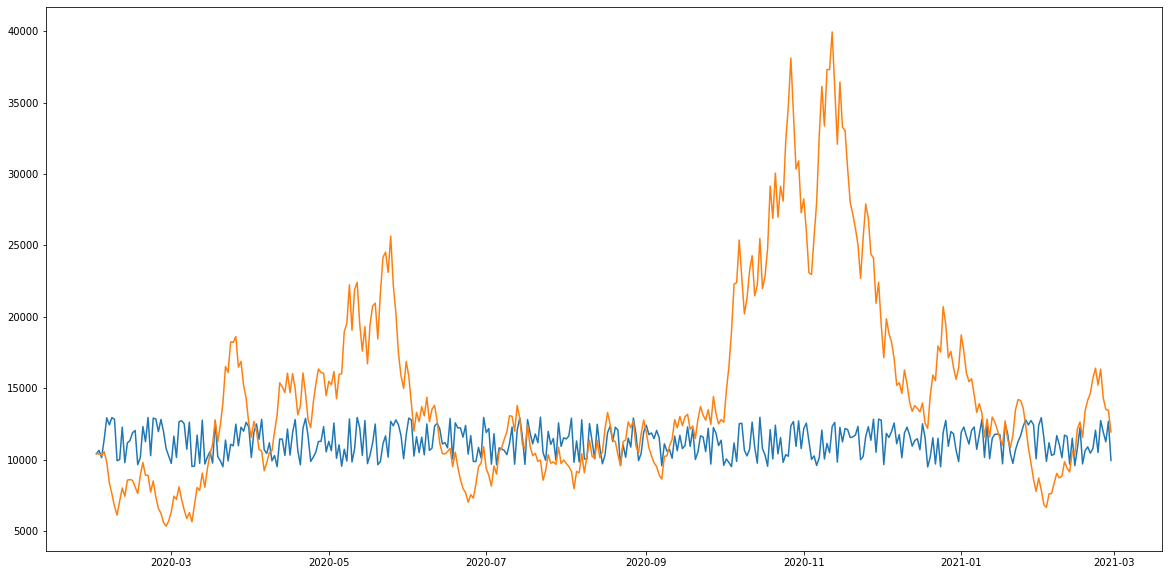

In [26]:
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

- Plotting the visual for forecast of next 10 years with 95% confidence interval

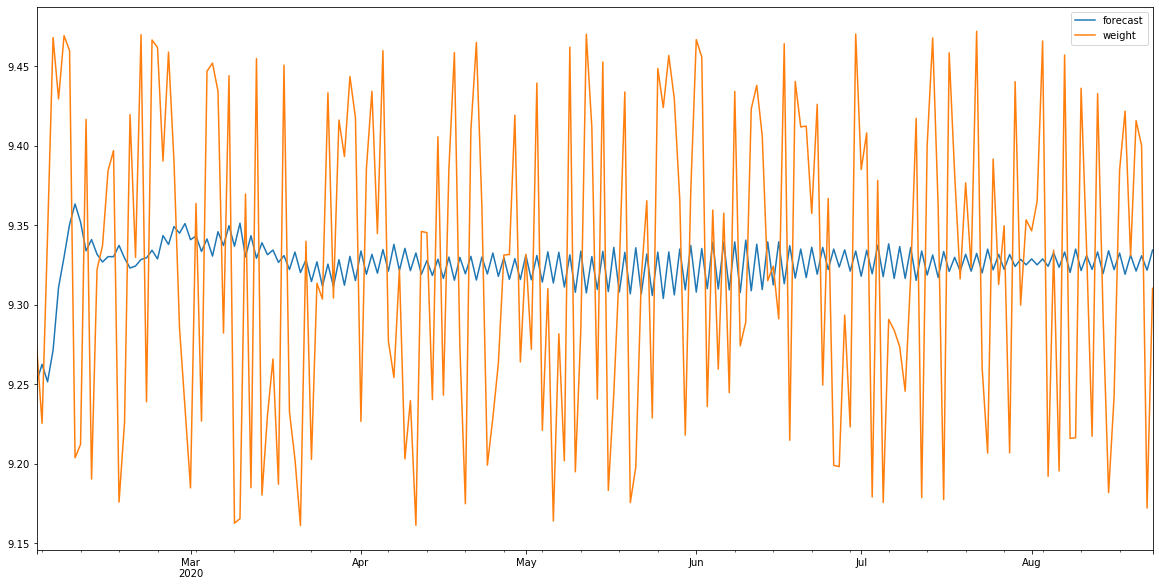

In [27]:
rcParams['figure.figsize']=20,10
results.plot_predict(1,204)
x=results.forecast(steps=120)

- Next 10 years predicted value on log scale

In [28]:
x[0]

array([9.32741895, 9.32900144, 9.32640065, 9.32901137, 9.32644551,
       9.32901247, 9.32649007, 9.32901395, 9.32653426, 9.32901578,
       9.3265781 , 9.32901797, 9.32662159, 9.32902051, 9.32666473,
       9.32902339, 9.32670752, 9.32902661, 9.32674999, 9.32903017,
       9.32679212, 9.32903405, 9.32683393, 9.32903825, 9.32687542,
       9.32904277, 9.3269166 , 9.32904759, 9.32695747, 9.32905272,
       9.32699803, 9.32905816, 9.3270383 , 9.32906388, 9.32707828,
       9.3290699 , 9.32711797, 9.3290762 , 9.32715738, 9.32908279,
       9.32719651, 9.32908965, 9.32723536, 9.32909677, 9.32727395,
       9.32910417, 9.32731227, 9.32911183, 9.32735034, 9.32911974,
       9.32738815, 9.32912791, 9.3274257 , 9.32913633, 9.32746302,
       9.32914499, 9.32750008, 9.32915389, 9.32753691, 9.32916303,
       9.32757351, 9.3291724 , 9.32760987, 9.329182  , 9.32764601,
       9.32919182, 9.32768193, 9.32920187, 9.32771762, 9.32921213,
       9.32775311, 9.3292226 , 9.32778838, 9.32923329, 9.32782

- Actual predicted value for next 10 years, after taking out log transformation

In [29]:
np.exp(x[0])

array([11242.0776363 , 11259.88225643, 11230.63571367, 11259.99398197,
       11231.13944885, 11260.00642858, 11231.6399312 , 11260.02301022,
       11232.1363384 , 11260.0436648 , 11232.62873895, 11260.06832366,
       11233.11720025, 11260.09691931, 11233.60178856, 11260.12938541,
       11234.08256905, 11260.16565673, 11234.55960578, 11260.20566914,
       11235.03296175, 11260.24935962, 11235.50269889, 11260.29666619,
       11235.96887812, 11260.34752792, 11236.4315593 , 11260.40188493,
       11236.89080131, 11260.45967833, 11237.34666205, 11260.52085025,
       11237.79919842, 11260.58534377, 11238.2484664 , 11260.65310295,
       11238.694521  , 11260.7240728 , 11239.13741633, 11260.79819924,
       11239.57720558, 11260.87542912, 11240.01394106, 11260.95571019,
       11240.44767419, 11261.03899108, 11240.87845552, 11261.12522127,
       11241.30633478, 11261.21435112, 11241.73136085, 11261.30633183,
       11242.15358178, 11261.40111539, 11242.57304482, 11261.49865464,
      

<b>*************************End****************************</b>